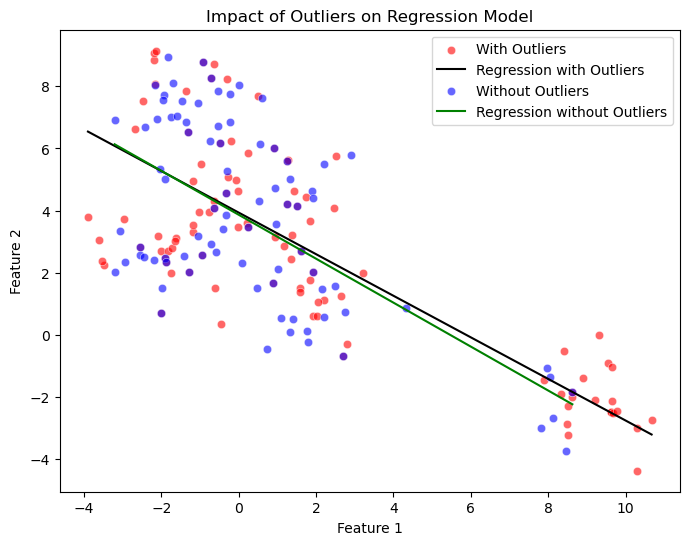

With Outliers: R-squared = 0.589, RMSE = 2.101
Without Outliers: R-squared = 0.378, RMSE = 2.380


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = "C:\\Users\\vatch\\Downloads\\archive (5)\\cluster_data.csv" # Path to your uploaded dataset
df = pd.read_csv(file_path)

# Selecting the predictor (independent variable) and target (dependent variable)
X = df[['Feature 1']]
y = df['Feature 2']

# Detect outliers using IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a filtered dataset without outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Split dataset with outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split dataset without outliers
X_no_outliers = df_no_outliers[['Feature 1']]
y_no_outliers = df_no_outliers['Feature 2']
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train Linear Regression Model with Outliers
model_with_outliers = LinearRegression()
model_with_outliers.fit(X_train, y_train)
y_pred_with_outliers = model_with_outliers.predict(X_test)

# Train Linear Regression Model without Outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no, y_train_no)
y_pred_no_outliers = model_no_outliers.predict(X_test_no)

# Calculate Performance Metrics
r2_with_outliers = r2_score(y_test, y_pred_with_outliers)
rmse_with_outliers = np.sqrt(mean_squared_error(y_test, y_pred_with_outliers))

r2_no_outliers = r2_score(y_test_no, y_pred_no_outliers)
rmse_no_outliers = np.sqrt(mean_squared_error(y_test_no, y_pred_no_outliers))

# Plot: Data with and without Outliers
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_test['Feature 1'], y=y_test, label="With Outliers", color="red", alpha=0.6)
sns.lineplot(x=X_test['Feature 1'], y=y_pred_with_outliers, label="Regression with Outliers", color="black")

sns.scatterplot(x=X_test_no['Feature 1'], y=y_test_no, label="Without Outliers", color="blue", alpha=0.6)
sns.lineplot(x=X_test_no['Feature 1'], y=y_pred_no_outliers, label="Regression without Outliers", color="green")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Impact of Outliers on Regression Model")
plt.legend()
plt.show()

# Print performance comparison
print(f"With Outliers: R-squared = {r2_with_outliers:.3f}, RMSE = {rmse_with_outliers:.3f}")
print(f"Without Outliers: R-squared = {r2_no_outliers:.3f}, RMSE = {rmse_no_outliers:.3f}")
